# Proyek Analisis Data: Bycycle Sharing Rents dataset
- **Nama:** Zildjian Vito Sulaiman
- **Email:** zildjianvito.s@gmail.com
- **ID Dicoding:** Zildjian Vito

## Menentukan Pertanyaan Bisnis

1. Pada season/musim apa jumlah perentalan terbanyak?
2. Bagaimana perbedaan performa perentalan sepeda pada hari kerja dan hari libur?
3. Bagaimana distribusi perentalan sepeda berdasarkan kondisi cuaca?
4. Bagaimana kecepatan angin mempengaruhi jumlah perentalan sepeda pada berbagai kategori suhu?



## Import Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

## Load Dataset

In [2]:
day_df = pd.read_csv("data\\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data\\hour.csv")
hour_df.head()   

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

### Statistical Info about day dataframe

In [4]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.duplicated().sum()

np.int64(0)

In [8]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

### Statistical Info about hour dataframe

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
hour_df.duplicated().sum()

np.int64(0)

### Observation after assesing data for day and hour dataframe
1. Day dataframe = no missing values,no duplicated values,no outliers,there are some column need to be change its datatype, drop and rename (because its not clear name)
2. Hour dataframe = no missing values,no duplicated values,no outliers,same like day dataframe there are some column need to be change its datatype drop and rename

## Cleaning data

### Cleaning data for day dataframe

In [14]:
day_df = day_df.drop(["instant"],axis=1)
## Dropped because duplicate with index

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [16]:
day_df = day_df.rename(columns={"dteday": "dateday",
                                "yr":"year",
                                "weathersit":"weather", 
                                "mnth": "month",
                                "temp":"temperature",
                                "atemp": "atemperature",
                                "hum":"humidity",
                                "cnt": "count"})

In [17]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temperature,atemperature,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temperature,atemperature,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning data for hour dataframe

In [19]:
hour_df = hour_df.drop("instant",axis=1)

In [20]:
hour_df = hour_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "weathersit": "weather",
        "mnth": "month",
        "temp": "temperature",
        "atemp": "atemperature",
        "hum": "humidity",
        "cnt": "count",
        "hr": "hour"
    }
)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dateday       17379 non-null  object 
 1   season        17379 non-null  int64  
 2   year          17379 non-null  int64  
 3   month         17379 non-null  int64  
 4   hour          17379 non-null  int64  
 5   holiday       17379 non-null  int64  
 6   weekday       17379 non-null  int64  
 7   workingday    17379 non-null  int64  
 8   weather       17379 non-null  int64  
 9   temperature   17379 non-null  float64
 10  atemperature  17379 non-null  float64
 11  humidity      17379 non-null  float64
 12  windspeed     17379 non-null  float64
 13  casual        17379 non-null  int64  
 14  registered    17379 non-null  int64  
 15  count         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [21]:
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       17379 non-null  datetime64[ns]
 1   season        17379 non-null  int64         
 2   year          17379 non-null  int64         
 3   month         17379 non-null  int64         
 4   hour          17379 non-null  int64         
 5   holiday       17379 non-null  int64         
 6   weekday       17379 non-null  int64         
 7   workingday    17379 non-null  int64         
 8   weather       17379 non-null  int64         
 9   temperature   17379 non-null  float64       
 10  atemperature  17379 non-null  float64       
 11  humidity      17379 non-null  float64       
 12  windspeed     17379 non-null  float64       
 13  casual        17379 non-null  int64         
 14  registered    17379 non-null  int64         
 15  count         17379 non-null  int64 

## EDA

### Explore (merging day and hour dataframe)

In [22]:
cols_to_merge =  [hour_df.columns.difference(day_df.columns),"dateday"]

day_hour_df = pd.merge(
    day_df,
    hour_df,
    on="dateday",
    how="inner",
    validate="one_to_many",
    suffixes=("","_y")
)
day_hour_df = day_hour_df.drop(day_hour_df.filter(regex="_y$").columns,axis=1)

## Visualization & Explanatory Analysis

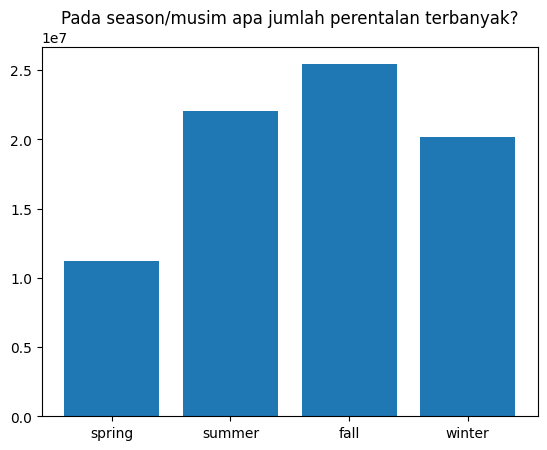

In [23]:
sum_season_index = day_hour_df.groupby("season")["count"].sum().index
sum_season_value = day_hour_df.groupby("season")["count"].sum().values

# day_hour_df.groupby("season")["count"].sum().reset_index()
fig, ax = plt.subplots()


label = ["spring","summer","fall","winter"]
ax.bar(data=day_hour_df, x=label,height=sum_season_value)

ax.set_title("Pada season/musim apa jumlah perentalan terbanyak?")

plt.show()

### Observation
Fall season has the most bicycle rentals,followed by summer,winter then spring  

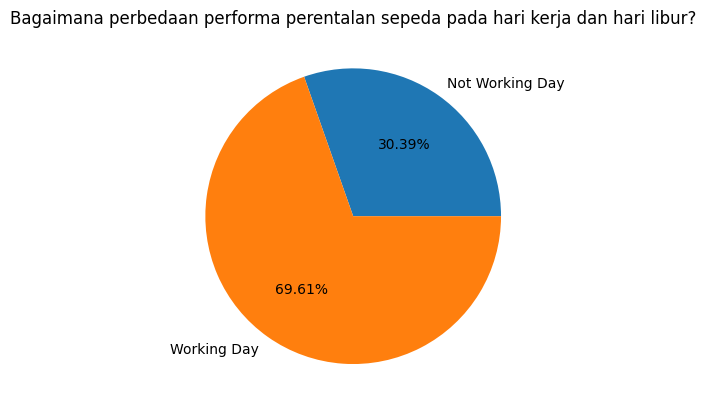

In [24]:
sum_workingday_value = day_hour_df.groupby("workingday")["count"].sum().values


fig,ax = plt.subplots()
labels = ["Not Working Day","Working Day"]
ax.pie(data=hour_df, autopct="%1.2f%%", labels=labels, x=sum_workingday_value)
ax.set_title(
    "Bagaimana perbedaan performa perentalan sepeda pada hari kerja dan hari libur?"
)
plt.show()

### Observation
More than 2/3 of bicycle rentals occur on working days

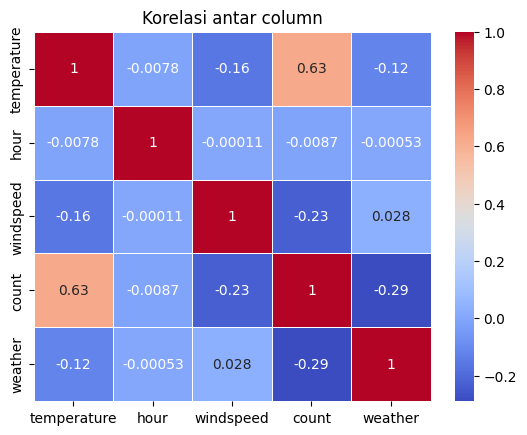

In [25]:
correlation = day_hour_df[["temperature", "hour", "windspeed", "count","weather"]].corr()

plt.figure()
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antar column")
plt.show()

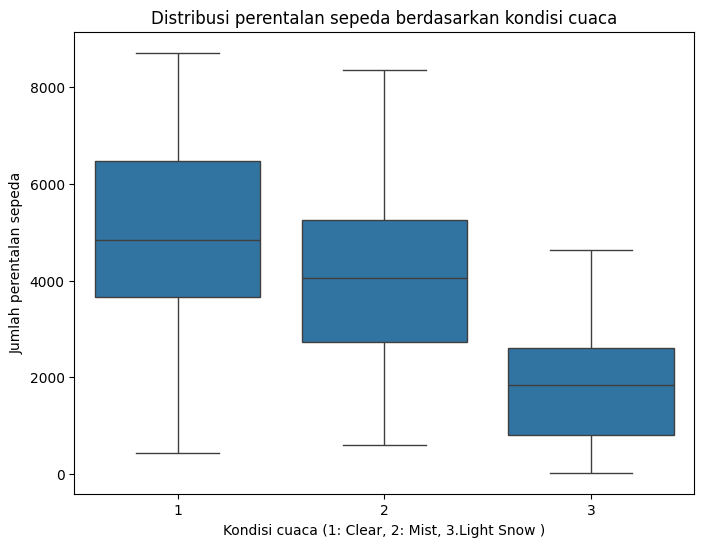

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=day_hour_df, x="weather", y="count")
plt.title("Distribusi perentalan sepeda berdasarkan kondisi cuaca")
plt.xlabel("Kondisi cuaca (1: Clear, 2: Mist, 3.Light Snow )")
plt.ylabel("Jumlah perentalan sepeda")
plt.show()


In [27]:
def categorize_temp(temp):
    if temp < 0.2:
        return "Dingin"
    elif temp < 0.6:
        return "Sedang"
    else:
        return "Panas"

In [28]:
def categorize_windspeed(windspeed):
    if windspeed < 0.2:
        return "Pelan"
    elif windspeed < 0.6:
        return "Sedang"
    else:
        return "Kencang"

In [29]:
day_hour_df["temp_category"] = day_hour_df["temperature"].apply(categorize_temp)
day_hour_df["windspeed_category"] = day_hour_df["windspeed"].apply(categorize_windspeed)


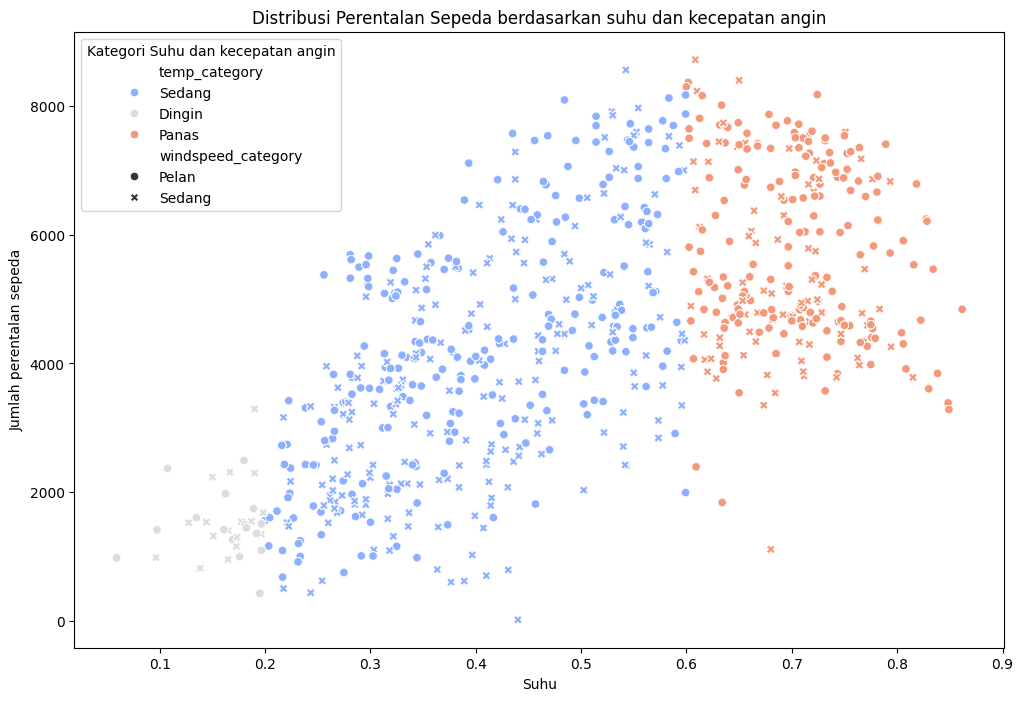

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=day_hour_df,
    x="temperature",
    y="count",
    hue="temp_category",
    style="windspeed_category",
    palette="coolwarm",
)
plt.title("Distribusi Perentalan Sepeda berdasarkan suhu dan kecepatan angin")
plt.xlabel("Suhu")
plt.ylabel("Jumlah perentalan sepeda")
plt.legend(title="Kategori Suhu dan kecepatan angin")
plt.show()

### Observation
Bicycle rentals usually take place when the weather is mild and the wind is light-moderate

In [31]:
day_hour_df.to_csv("day_hour_data.csv",index=False)